### VERY Important  : XOR

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#tf.set_random_seed(777)  # for reproducibility

* Hyperparameters

In [0]:
learning_rate = 0.1
nb_epoch = 10000

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [7]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
# Launch graph
sess = tf.Session()

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [11]:
for i in range(nb_epoch+1):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print('step={} / cost={}'.format(i, c1))

step=0 / cost=0.251415878534317
step=1000 / cost=0.25061941146850586
step=2000 / cost=0.2503371238708496
step=3000 / cost=0.2502073049545288
step=4000 / cost=0.2501390874385834
step=5000 / cost=0.2500997483730316
step=6000 / cost=0.2500750720500946
step=7000 / cost=0.2500585615634918
step=8000 / cost=0.25004684925079346
step=9000 / cost=0.2500380575656891
step=10000 / cost=0.2500312626361847


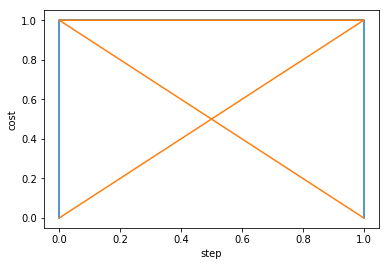

In [15]:
plt.plot(x_data, y_data)
plt.xlabel('step')
plt.ylabel('cost')
plt.show()

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용 10000번이 변하는 동안의 값 / 그래프 옛날 코드를 보면 있을 것임.

### Check the results

In [0]:
print(W1)
print(sess.run(W1))

In [0]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    #print( i, sess.run(l2))
    print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

### 참고 : Sigmoid

In [0]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

Sigmoid를 그려볼까요?

In [0]:
x1 = np.arange(-10,10, 0.5)
print(x1)

In [0]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid')